In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clicks = pd.read_csv('../data/clicks.csv')
eventos = pd.read_csv('../data/events.csv')

/home/pablocruz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
clicks.columns

Index(['advertiser_id', 'action_id', 'source_id', 'created', 'country_code',
       'latitude', 'longitude', 'wifi_connection', 'carrier_id', 'trans_id',
       'os_minor', 'agent_device', 'os_major', 'specs_brand', 'brand',
       'timeToClick', 'touchX', 'touchY', 'ref_type', 'ref_hash'],
      dtype='object')

In [4]:
fechaDeEventos = pd.to_datetime(eventos['date'])
fechaDeEventos.head()

0   2019-03-05 00:09:36.966
1   2019-03-05 00:09:38.920
2   2019-03-05 00:09:26.195
3   2019-03-05 00:09:31.107
4   2019-03-09 21:00:36.585
Name: date, dtype: datetime64[ns]

In [5]:
fechaDeClicks = pd.to_datetime(clicks['created'])
fechaDeClicks.head()

0   2019-03-06 22:42:12.755
1   2019-03-08 10:24:30.641
2   2019-03-08 15:24:16.069
3   2019-03-06 03:08:51.543
4   2019-03-06 03:32:55.570
Name: created, dtype: datetime64[ns]

In [6]:
dia = fechaDeClicks.dt.date
dia.value_counts()

2019-03-12    5204
2019-03-11    4557
2019-03-10    3966
2019-03-13    3468
2019-03-09    3283
2019-03-07    2989
2019-03-08    2839
2019-03-05      31
2019-03-06      14
Name: created, dtype: int64

In [7]:
#cantidad de clicks por hora
horaDeClicks = pd.to_datetime(fechaDeClicks.dt.strftime('%Y-%m-%d %H'))
horaDeClicks.value_counts().head()

2019-03-07 23:00:00    2172
2019-03-09 01:00:00    1154
2019-03-08 01:00:00     988
2019-03-10 02:00:00     887
2019-03-11 01:00:00     878
Name: created, dtype: int64

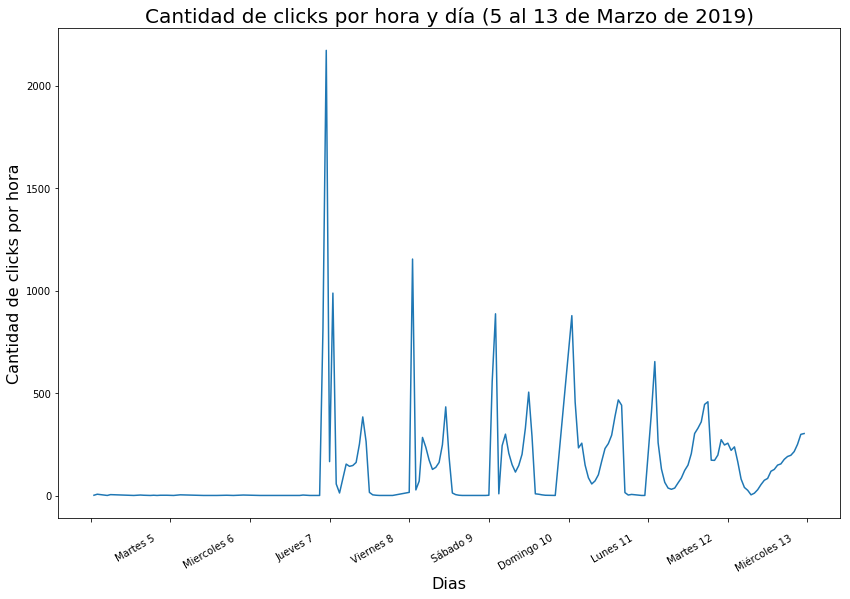

In [8]:
plot = horaDeClicks.value_counts().plot(kind='line',figsize=(14,10))
plot.set_title('Cantidad de clicks por hora y día (5 al 13 de Marzo de 2019)', fontsize=20)
plot.set_xlabel('Dias',fontsize=16)
plot.set_ylabel('Cantidad de clicks por hora',fontsize=16)
espacio = ''
plot.set_xticklabels(['', 'Martes 5     ', 'Miercoles 6     ', 'Jueves 7     ', 'Viernes 8     ', 'Sábado 9     ', 'Domingo 10     ', 'Lunes 11     ', 'Martes 12     ', 'Miércoles 13     '])
plt.show()

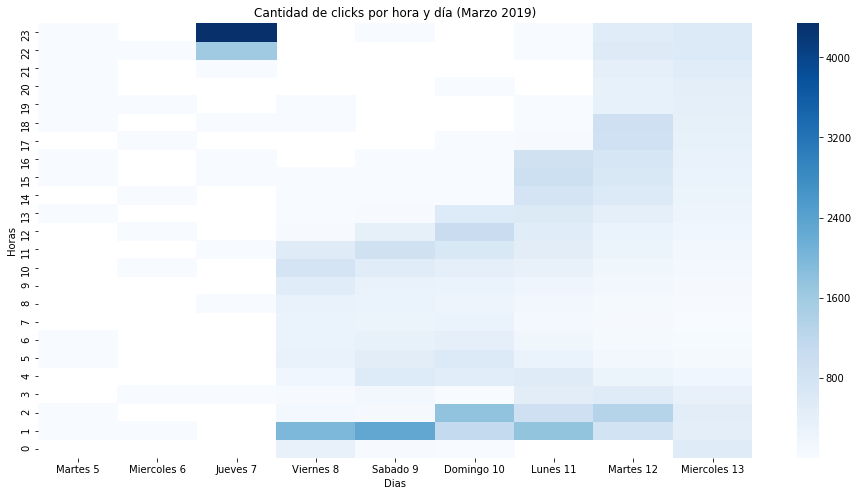

In [9]:
#para heatmap
import numpy as np
actividad2 = clicks.loc[:,['created']]
actividad2['created'] = pd.to_datetime(actividad2['created'])
actividad2['dia'] = actividad2['created'].dt.day
actividad2['hora'] = actividad2['created'].dt.hour
actividad3 = actividad2.loc[:,['dia', 'hora']].groupby(['dia', 'hora']).agg(np.size).reset_index()
pivoted = pd.pivot_table(actividad3, values=0, columns='dia', index='hora')
fig, ax = plt.subplots(figsize=(16,8))
g = sns.heatmap(pivoted,cmap='Blues');
g.set_title("Cantidad de clicks por hora y día (Marzo 2019)")
g.set_xlabel('Dias')
g.set_ylabel('Horas')
g.set_xticklabels(['Martes 5', 'Miercoles 6','Jueves 7','Viernes 8','Sabado 9','Domingo 10', 'Lunes 11', 'Martes 12', 'Miercoles 13'])
g.invert_yaxis()

In [10]:
#Podemos ver q todos los clicks registrados no fueron con conexion wifi
cantFilas = clicks.shape[0]
print('cantidad de Filas: ',cantFilas)
clicks['wifi_connection'].value_counts()

cantidad de Filas:  26351


False    26351
Name: wifi_connection, dtype: int64

In [11]:
jamppsClient = clicks['advertiser_id'].value_counts().reset_index()
jamppsClient.columns=['advertiser_id','count']
jamppsClient


,advertiser_id,count
0,3,26263
1,0,70
2,2,12
3,7,2
4,1,2
5,8,1
6,5,1


In [12]:
bestJamppsClient = jamppsClient[jamppsClient['advertiser_id']==3]['count'].sum()
othersJamppsClient = jamppsClient[jamppsClient['advertiser_id']!=3]['count'].sum()

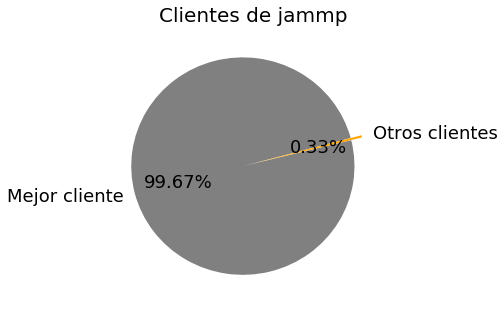

In [13]:
plot = plt.figure(figsize=(5, 5))
nombres = ['Mejor cliente', 'Otros clientes']
plot = plt.title('Clientes de jammp', fontsize=20)
plot = plt.pie([bestJamppsClient,othersJamppsClient], labels=nombres, autopct='%1.2f%%', startangle=15, colors=['grey', 'orange'], explode=(0.1, 0),shadow = False, textprops={'fontsize': 18})
plt.show()

In [14]:
#fila llena de NaNs
clicks['action_id'].value_counts()

Series([], Name: action_id, dtype: int64)

0    17009
1     4298
6     3371
5     1628
Name: source_id, dtype: int64

Text(0,0.5,'id')

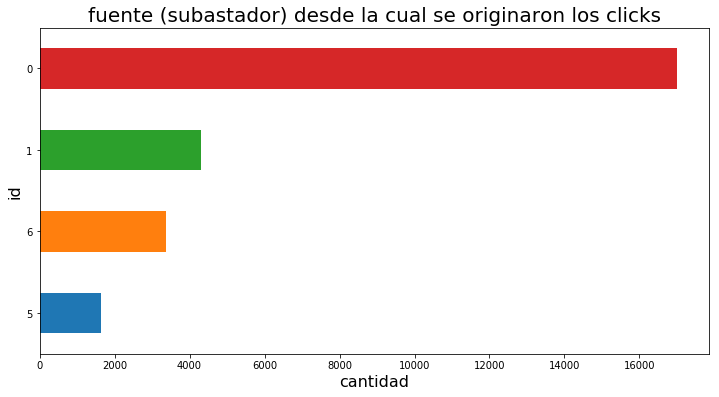

In [15]:
#fuente (subastador) desde la cual se originaron los clicks
display(clicks['source_id'].value_counts().head(4))
g = clicks['source_id'].value_counts().head(4).sort_values().plot(kind='barh', figsize=(12,6))
g.set_title("fuente (subastador) desde la cual se originaron los clicks", fontsize =20)
g.set_xlabel('cantidad', fontsize=16)
g.set_ylabel('id', fontsize=16)


In [16]:
#Conclusion: Los datos del dataset corresponden a un solo pais
#datos sobre un solo pais 
clicks['country_code'].value_counts()

6,33359710263339E+018    26351
Name: country_code, dtype: int64

In [17]:
clicks['latitude'].value_counts().head()

1.205689    22949
1.218924     1105
1.235406      281
1.205393      261
1.208059      186
Name: latitude, dtype: int64

In [18]:
clicks['longitude'].value_counts().head()

1.070234    22949
1.071209     1105
1.063737      281
1.077238      250
1.069624      186
Name: longitude, dtype: int64

In [19]:
#Ubicacion de los 5 lugares donde mas se hizo clicks
latitude = clicks['latitude'].value_counts().head().reset_index()
latitude.columns = ['latitude','count']
display(latitude)

longitude = clicks['longitude'].value_counts().head().reset_index()
longitude.columns = ['longitude','count']
display(longitude)


location = pd.merge(latitude,longitude)
location[['latitude','longitude','count']]

,latitude,count
0,1.205689,22949
1,1.218924,1105
2,1.235406,281
3,1.205393,261
4,1.208059,186


,longitude,count
0,1.070234,22949
1,1.071209,1105
2,1.063737,281
3,1.077238,250
4,1.069624,186


,latitude,longitude,count
0,1.205689,1.070234,22949
1,1.218924,1.071209,1105
2,1.235406,1.063737,281
3,1.208059,1.069624,186


4.0     4569
6.0     3474
1.0     3307
13.0    2998
3.0     2944
12.0    2273
0.0     1368
10.0     753
14.0     588
9.0      555
17.0     519
19.0     496
18.0     468
22.0     462
2.0      264
15.0     263
5.0      212
21.0     211
25.0     202
30.0     121
Name: carrier_id, dtype: int64

Text(0,0.5,'operadores de telefonía móvil del dispositivo')

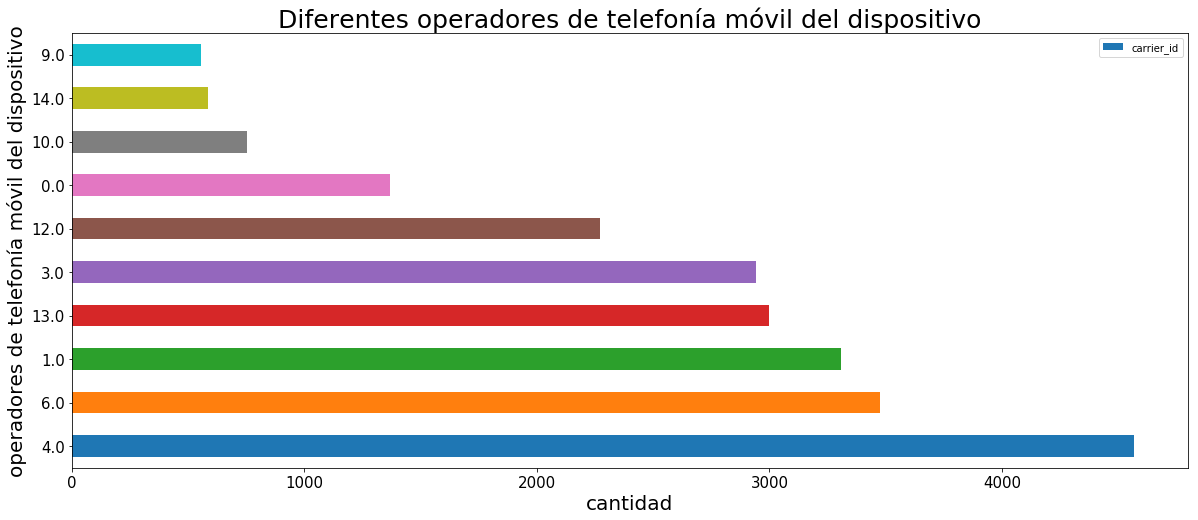

In [20]:
#diferentes operadores de telefonía móvil del dispositivo
##cambiar nombres aiuuuda
display(clicks['carrier_id'].value_counts().head(20))

ax = clicks['carrier_id'].value_counts().head(10).plot(kind='barh', figsize=(20, 8), legend=True, fontsize=15)
ax.set_title("Diferentes operadores de telefonía móvil del dispositivo", fontsize=25)
ax.set_xlabel("cantidad", fontsize=20)
ax.set_ylabel("operadores de telefonía móvil del dispositivo", fontsize=20)


In [21]:
#agente para el dispositivo en el que se realizó el clic (modelo)
#Los 5 modelos con mas frecuencia
clicks['agent_device'].value_counts().head(10)

3.516812e+18    656
1.754528e+18    326
6.882415e+18    156
7.787531e+18    132
4.281729e+18    122
4.445252e+18     99
6.589622e+18     87
2.066431e+17     81
3.686067e+17     75
8.656854e+18     74
Name: agent_device, dtype: int64

In [22]:
#... no se sabe q es specs brand
clicks['specs_brand'].value_counts()

3,92184377613098E+017    16172
2,73303597766644E+018    10164
8,93060513294791E+018       10
3,85516778853128E+018        4
5,67529598527356E+018        1
Name: specs_brand, dtype: int64

In [25]:
# marca del dispositivo
# frecuencia de la marca de dispositivos donde se registraron mas clicks
clicks['brand'].value_counts().head()

2.0    2027
0.0    1917
1.0    1521
4.0     240
3.0     186
Name: brand, dtype: int64

In [23]:
# marca del dispositivo
# frecuencia de la marca de dispositivos donde se registraron mas clicks
clicks['brand'].value_counts()
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [26]:
#no se establece ningun patron en el tiempo en el q hace un click.
clicks['timeToClick'].value_counts().head()

261.00    11
0.21       9
267.00     9
338.00     9
232.00     8
Name: timeToClick, dtype: int64

In [34]:
tiempos = clicks[['timeToClick']]
#tiempos['0 a 5'] = tiempoClicks[tiempoClicks['timeToClick']<1000]
#tiempos['5 a 10'] = tiempoClicks[(tiempoClicks['timeToClick']>5) & (tiempoClicks['timeToClick']<10)]
#tiempos['10 a 15'] = tiempoClicks[(tiempoClicks['timeToClick']>0) & (tiempoClicks['timeToClick']<15)]
#display(clicks0a5.describe())
#display(clicks5a10.describe())
#display(clicks10a20.describe())

#tiempos['5 a 10'] = tiempos['5 a 10'] - 5
#tiempos['10 a 15'] = tiempos['10 a 15'] - 10

#clicks0a5.rename(columns={'timeToClick': '0 a 5' })
#clicks5a10.rename(columns={'timeToClick': '5 a 10' })
#clicks10a20.rename(columns={'timeToClick': '10 a 20' })
#display(tiempos[['0 a 5']].describe())



In [35]:
#tiempos = clicks[['timeToClick']]
#tiempos['0 a 1000'] = tiempoClicks[(tiempoClicks['timeToClick']>1000) & (tiempoClicks['timeToClick']<10000)]
#tiempos['0 a 1000'].count()
#tiempos['10 a 15'] = tiempoClicks[(tiempoClicks['timeToClick']>0) & (tiempoClicks['timeToClick']<15)]

In [29]:
clicks[['touchX','touchY']].head()

,touchX,touchY
0,905.0,78.0
1,NaN,NaN
2,946.0,473.0
3,35.0,431.0
4,54.0,423.0


Text(0,0.5,'touchY')

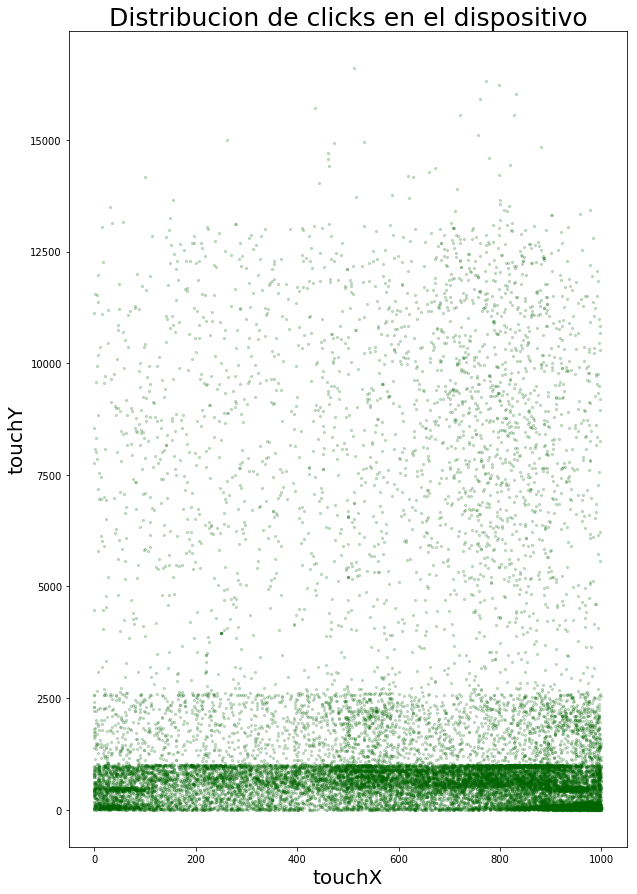

In [30]:
# library & dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10, 15))
## use the function regplot to make a scatterplot Without regression fit:
ax = sns.regplot(x=clicks['touchX'], y=clicks['touchY'], fit_reg=False, scatter_kws={"color":"darkgreen","alpha":0.2,"s":5} )

ax.set_title("Distribucion de clicks en el dispositivo", fontsize=25)
ax.set_xlabel("touchX", fontsize=20)
ax.set_ylabel("touchY", fontsize=20)


##Analizando el grafico de distribuciones de clicks en el dispositivo, se puede observar que donde mas clicks se registraron es en la zona inferior del dispositivos
##que suponemos que debe tener alguna relacion con los pulgares. Por lo tanto, para los anunciantes,
##deberian poner informacion importante en ese sector.

In [31]:
clicks.columns

Index(['advertiser_id', 'action_id', 'source_id', 'created', 'country_code',
       'latitude', 'longitude', 'wifi_connection', 'carrier_id', 'trans_id',
       'os_minor', 'agent_device', 'os_major', 'specs_brand', 'brand',
       'timeToClick', 'touchX', 'touchY', 'ref_type', 'ref_hash'],
      dtype='object')

In [32]:
coordenadas = clicks.loc[:,['latitude', 'longitude']]
coordenadas = coordenadas[coordenadas['latitude']< 1.205689]
coordenadas

,latitude,longitude
0,1.205689,1.070234
2,1.205689,1.070234
3,1.205689,1.070234
4,1.205689,1.070234
7,1.205393,1.077238
8,1.205058,1.077332
9,1.205689,1.070234
10,1.205689,1.070234
11,1.205689,1.070234
12,1.205689,1.070234
